# Семинар 8: визуализация данных, EDA

## Вступление

На семинаре мы будем заниматься построением различных визуализаций. Наша цель — провести **разведочный анализ данных** (exploratory data analysis, EDA), чтобы исследовать поведение данных и выявить в них закономерности. Мы продолжим работать с данными о пассажирах Титаника.

### Цели:
* познакомиться с библиотеками matplotlib, seaborn и визуализациями в pandas
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* конструировать новые признаки

### Как нужно строить графики:
1. Если график стандартный, используйте matplotlib напрямую из pandas
2. Если график нестандартный, используйте matplotlib
3. Если график совсем нестандартный, то разделите его на несколько стандартных и используйте matplotlib
4. Если нужны профильные красивые графики, график гистограммы с распределением, японские свечи, график pairplot или heatmap, то используйте seaborn (это всё тоже можно сделать в matplotlib, но будет дольше)
5. Если у вас есть два часа времени, чтобы построить один график нормального качества, то используйте plotly
6. Если вам нужно, чтобы получился один красивый график, за который вам очень хорошо заплатят, то используйте plotly

### План семинара:
1. Учимся строить графики
2. Обрабатываем признаки
3. Однофакторный анализ

In [11]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")
plt.style.use("seaborn")

## 1. Учимся строить графики

Сперва загрузим данные и ещё раз изучим базовую информацию при помощи pandas.

In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv",
    sep=";",
)

In [3]:
print(f"Data size: {df.shape}")
df.head()

Data size: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isna().mean()  # df.isnull() — то же самое, что df.isna()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Теперь давайте посмотрим на данные глазами. По диагонали — маргинальное распределение каждой числовой переменной с учётом целевой переменной. В остальных ячейках — scatter plot каждой пары числовых переменных с учётом целевой переменной.

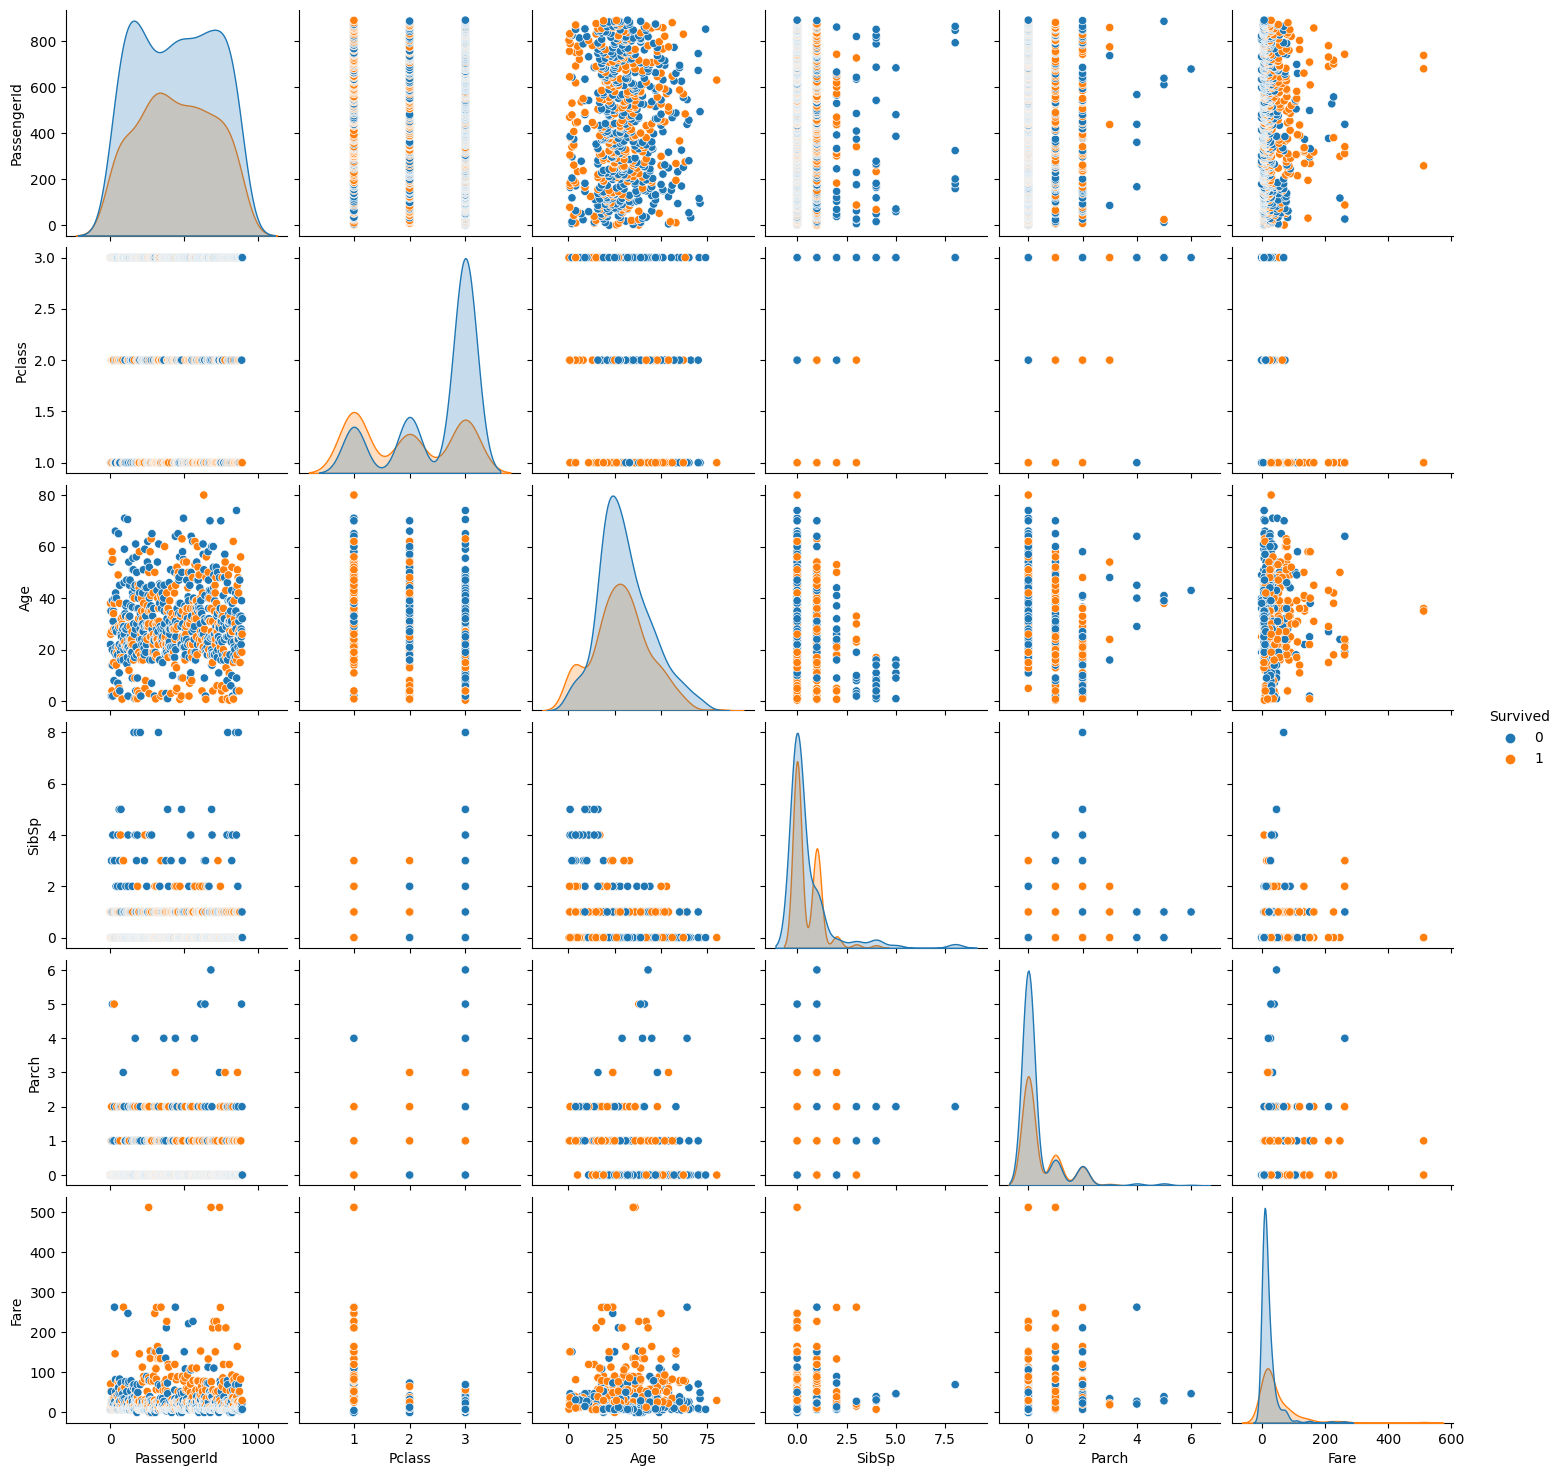

In [6]:
sns.pairplot(df, hue="Survived")

Начинаем работу с графиками matplotlib и pandas (вызывает те же функции matplotlib).

<Axes: title={'center': 'Survived'}, xlabel='Survivance', ylabel='Headcount'>

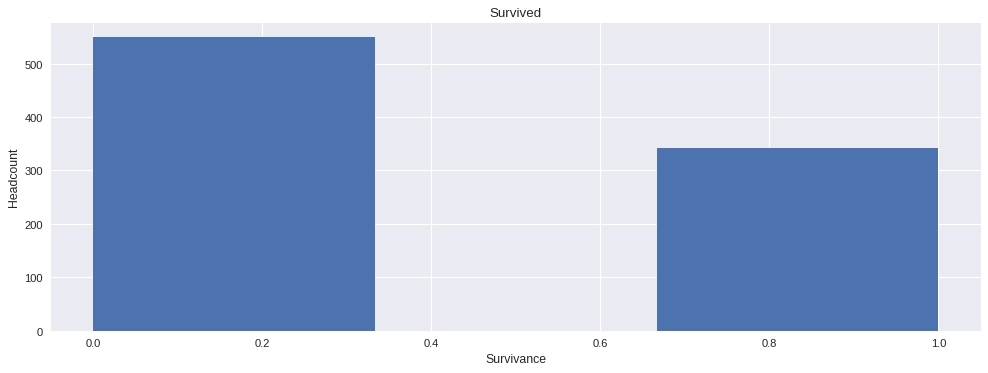

In [19]:
plt.figure(figsize=(15, 5), dpi=80)
plt.title("Survived")
plt.xlabel('Survivance')
plt.ylabel('Headcount')
df["Survived"].hist(bins=3)

<Axes: >

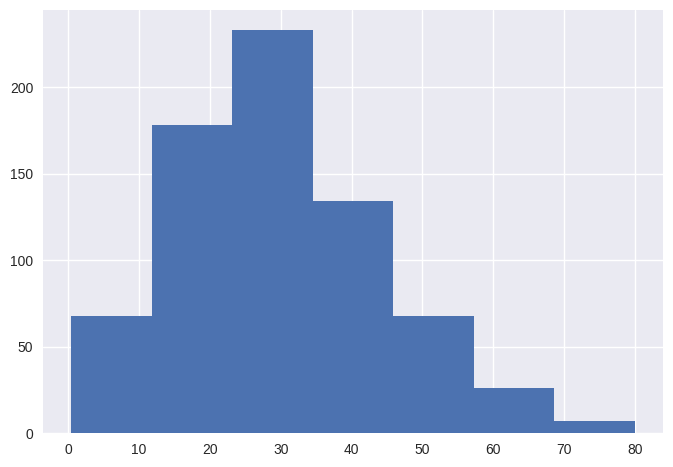

In [18]:
df["Age"].hist(bins=7)

[]

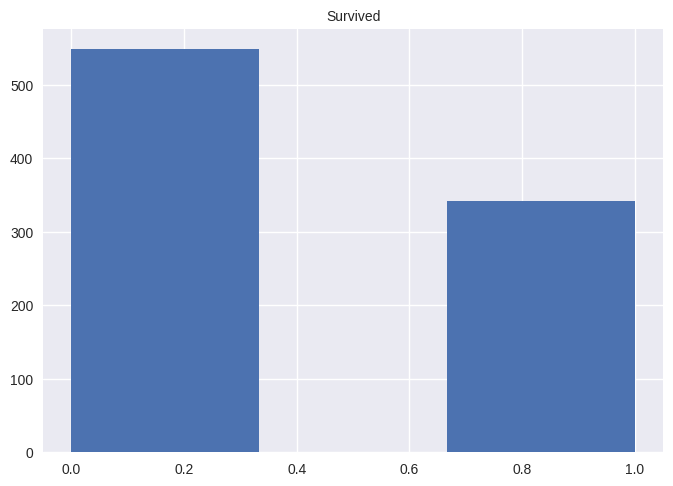

In [21]:
# То же самое, но только с matplotlib
# plt.figure(figsize=(8, 3), dpi=80)
plt.title("Survived", fontsize=10)
plt.hist(df["Survived"], bins=3)
plt.plot()

Построим гистаграмму по возрасту. Обратите внимание, что размер фигуры (и многие другие параметры, например, размер шрифтов) можно задавать один раз на весь нутбук при помощи `plt.rc.Params`.

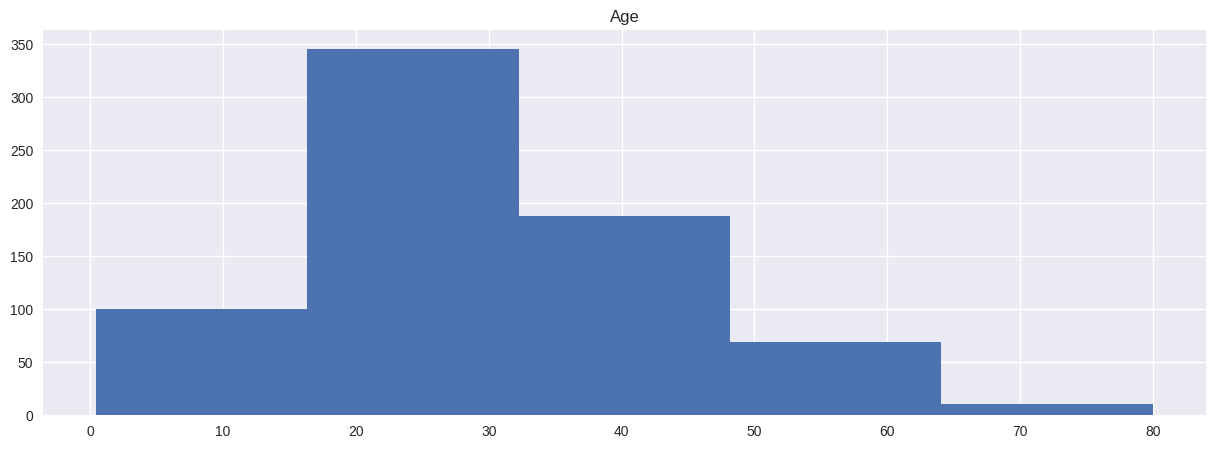

In [23]:
# plt.figure(figsize=(15, 5), dpi=300)
plt.rcParams["figure.figsize"] = (15, 5)
plt.title("Age")
df["Age"].hist(bins=5);

Для лёгкого разделения по группам выживших и не выживших, используем seaborn.

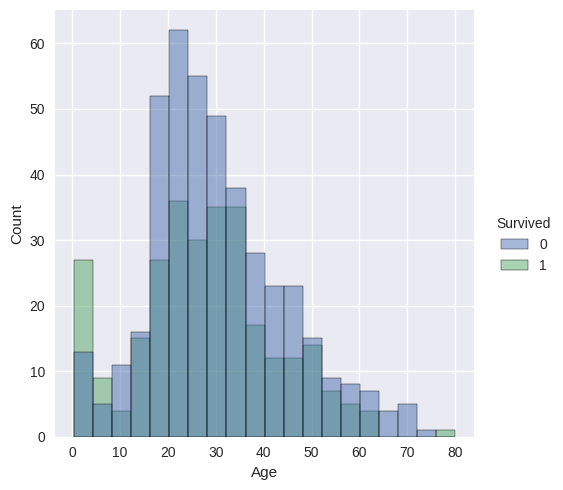

In [24]:
sns.displot(df, x="Age", hue="Survived")
plt.show()

В matplotlib будет дольше и менее красиво :(

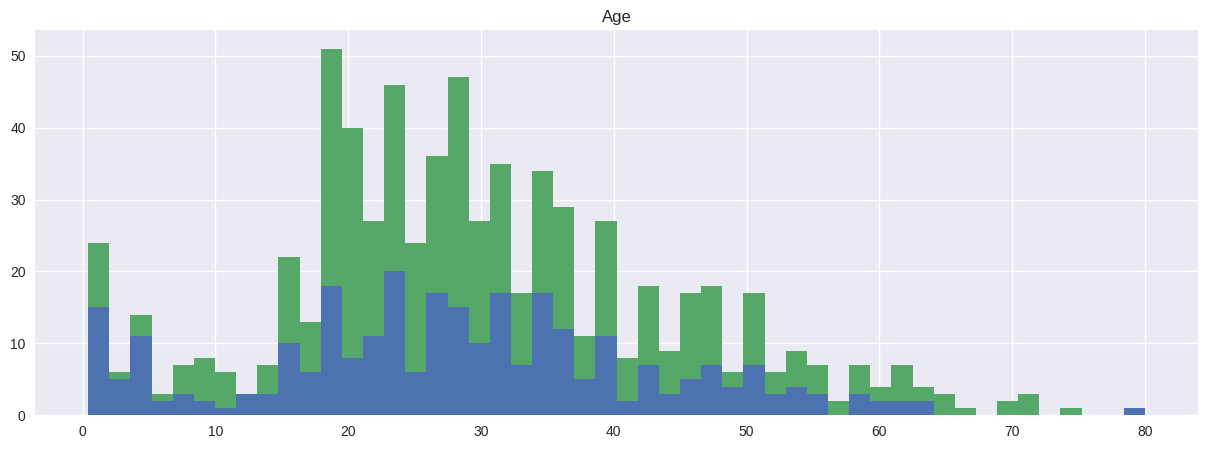

In [25]:
plt.title("Age")
plt.hist(
    [df["Age"][df["Survived"] == 1], df["Age"][df["Survived"] == 0]],
    stacked=True,
    bins=50,
);

Давайте оценим корреляцию между столбцами числовых признаков.

In [26]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Сделаем её чуть более читаемой.

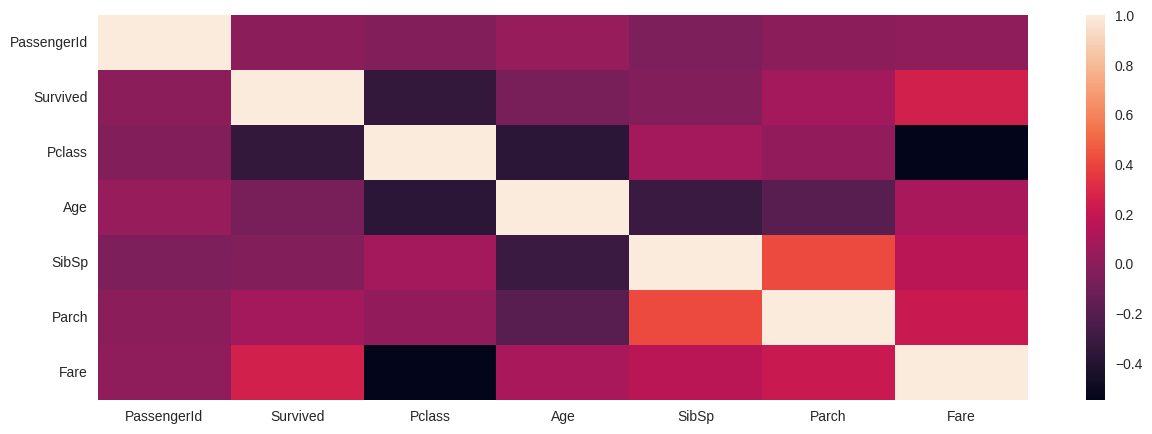

In [27]:
sns.heatmap(df.corr());

И ещё более читаемой!

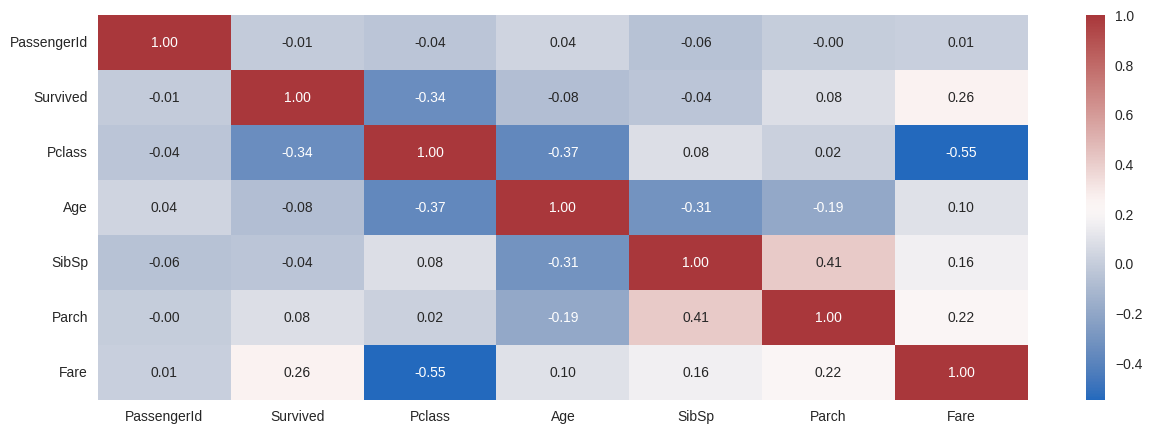

In [28]:
sns.heatmap(df.corr(), cmap="vlag", annot=True, fmt="0.2f");

Неповторимый идеал.

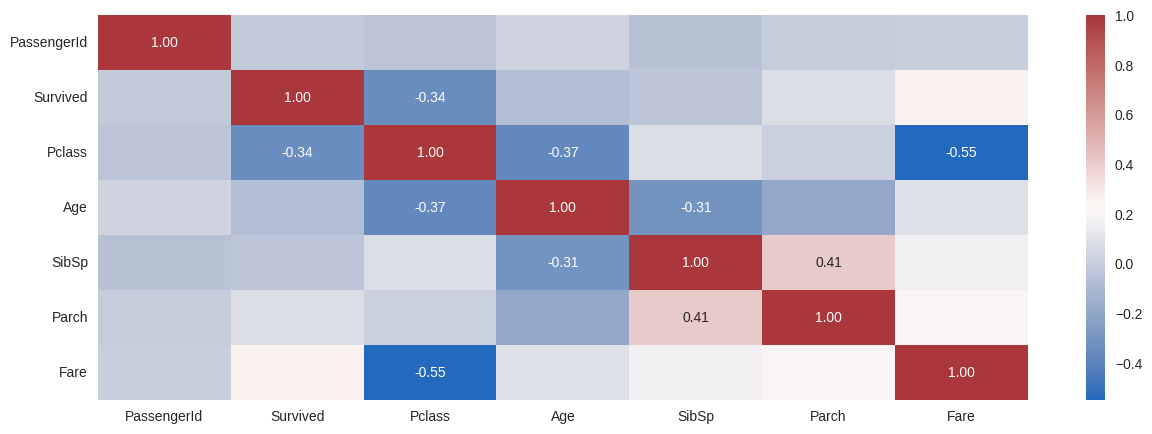

In [29]:
ax = sns.heatmap(df.corr(), cmap="vlag", annot=True, fmt="0.2f")
for t in ax.texts:
    if float(t.get_text()) >= 0.3 or float(t.get_text()) <= -0.3:
        t.set_text(t.get_text())
    else:
        t.set_text("")

Построим распредление количества билетов разных классов при помощи bar plot.

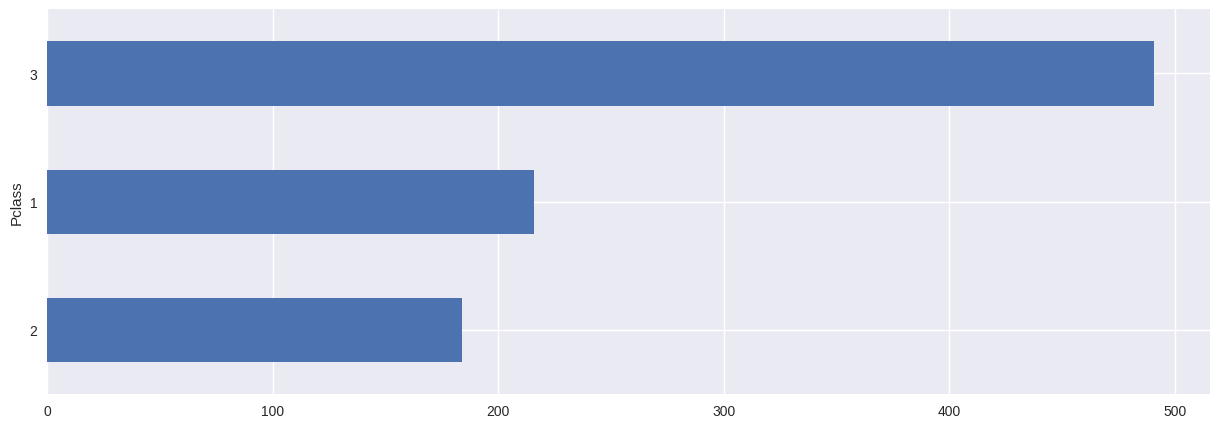

In [30]:
df.groupby("Pclass")["Name"].nunique().sort_values().plot(kind="barh");

Посмотрим на взаимосвязь разных переменных при помощи scatter plot.

Как scatter строить НЕ нужно:

In [ ]:
plt.scatter(df["Pclass"], df["Survived"]);

Как scatter строить нужно:

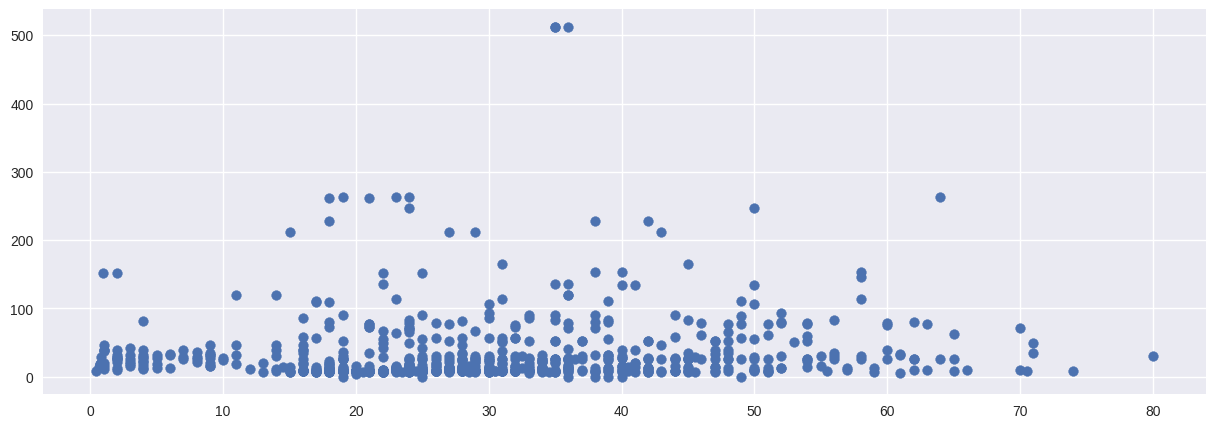

In [32]:
plt.scatter(df["Age"], df["Fare"]);

Ещё на график можно что-то дорисовать. Например, дополнительные оси.

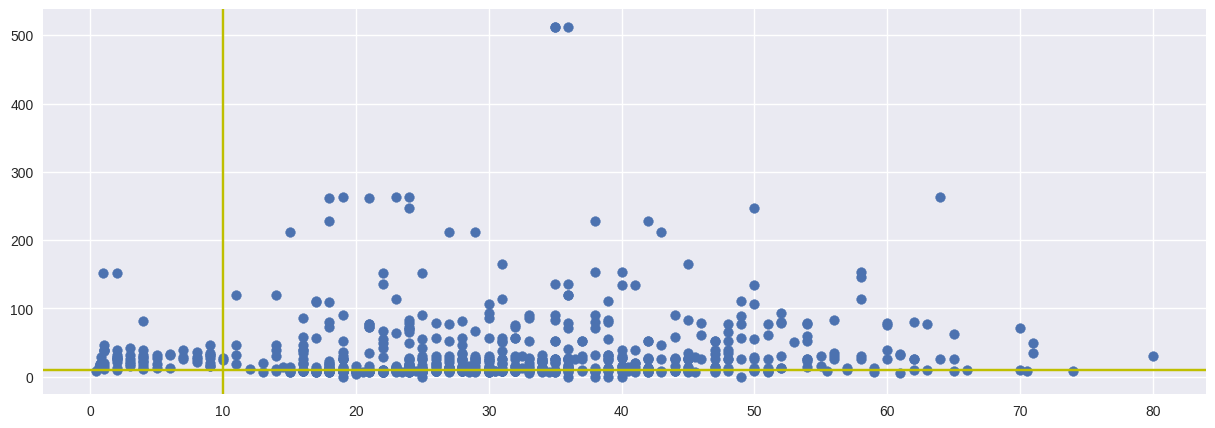

In [33]:
plt.scatter(df["Age"], df["Fare"])
plt.axhline(10, c="y")
plt.axvline(10, c="y");

Вишенка на торте: рисуем несколько графиков на одной фигуре.

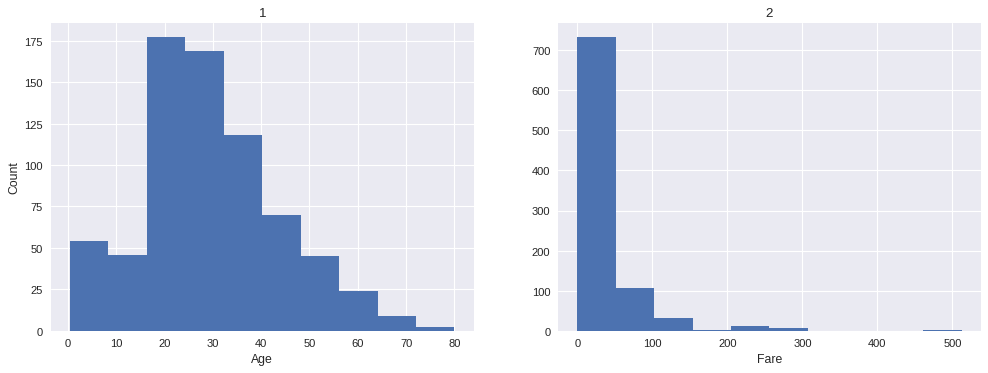

In [35]:
plt.figure(figsize=(15, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.title("1")
plt.hist(df["Age"])
plt.ylabel("Count")
plt.xlabel("Age")

plt.subplot(1, 2, 2)
plt.title("2")
plt.hist(df["Fare"])
plt.xlabel("Fare")

plt.show()

В способе выше мы должны каждый раз переключаться между тем, где мы рисуем, при помощи `plt.subplot(n_rows, n_cols, idx)`. Часто это не очень удобно, поэтому давайте посмотрим на другой способ взаимодействия с подграфиками. Этот способ позволит, например, удобно итерироваться в цикле по графикам и отрисовывать что-то.

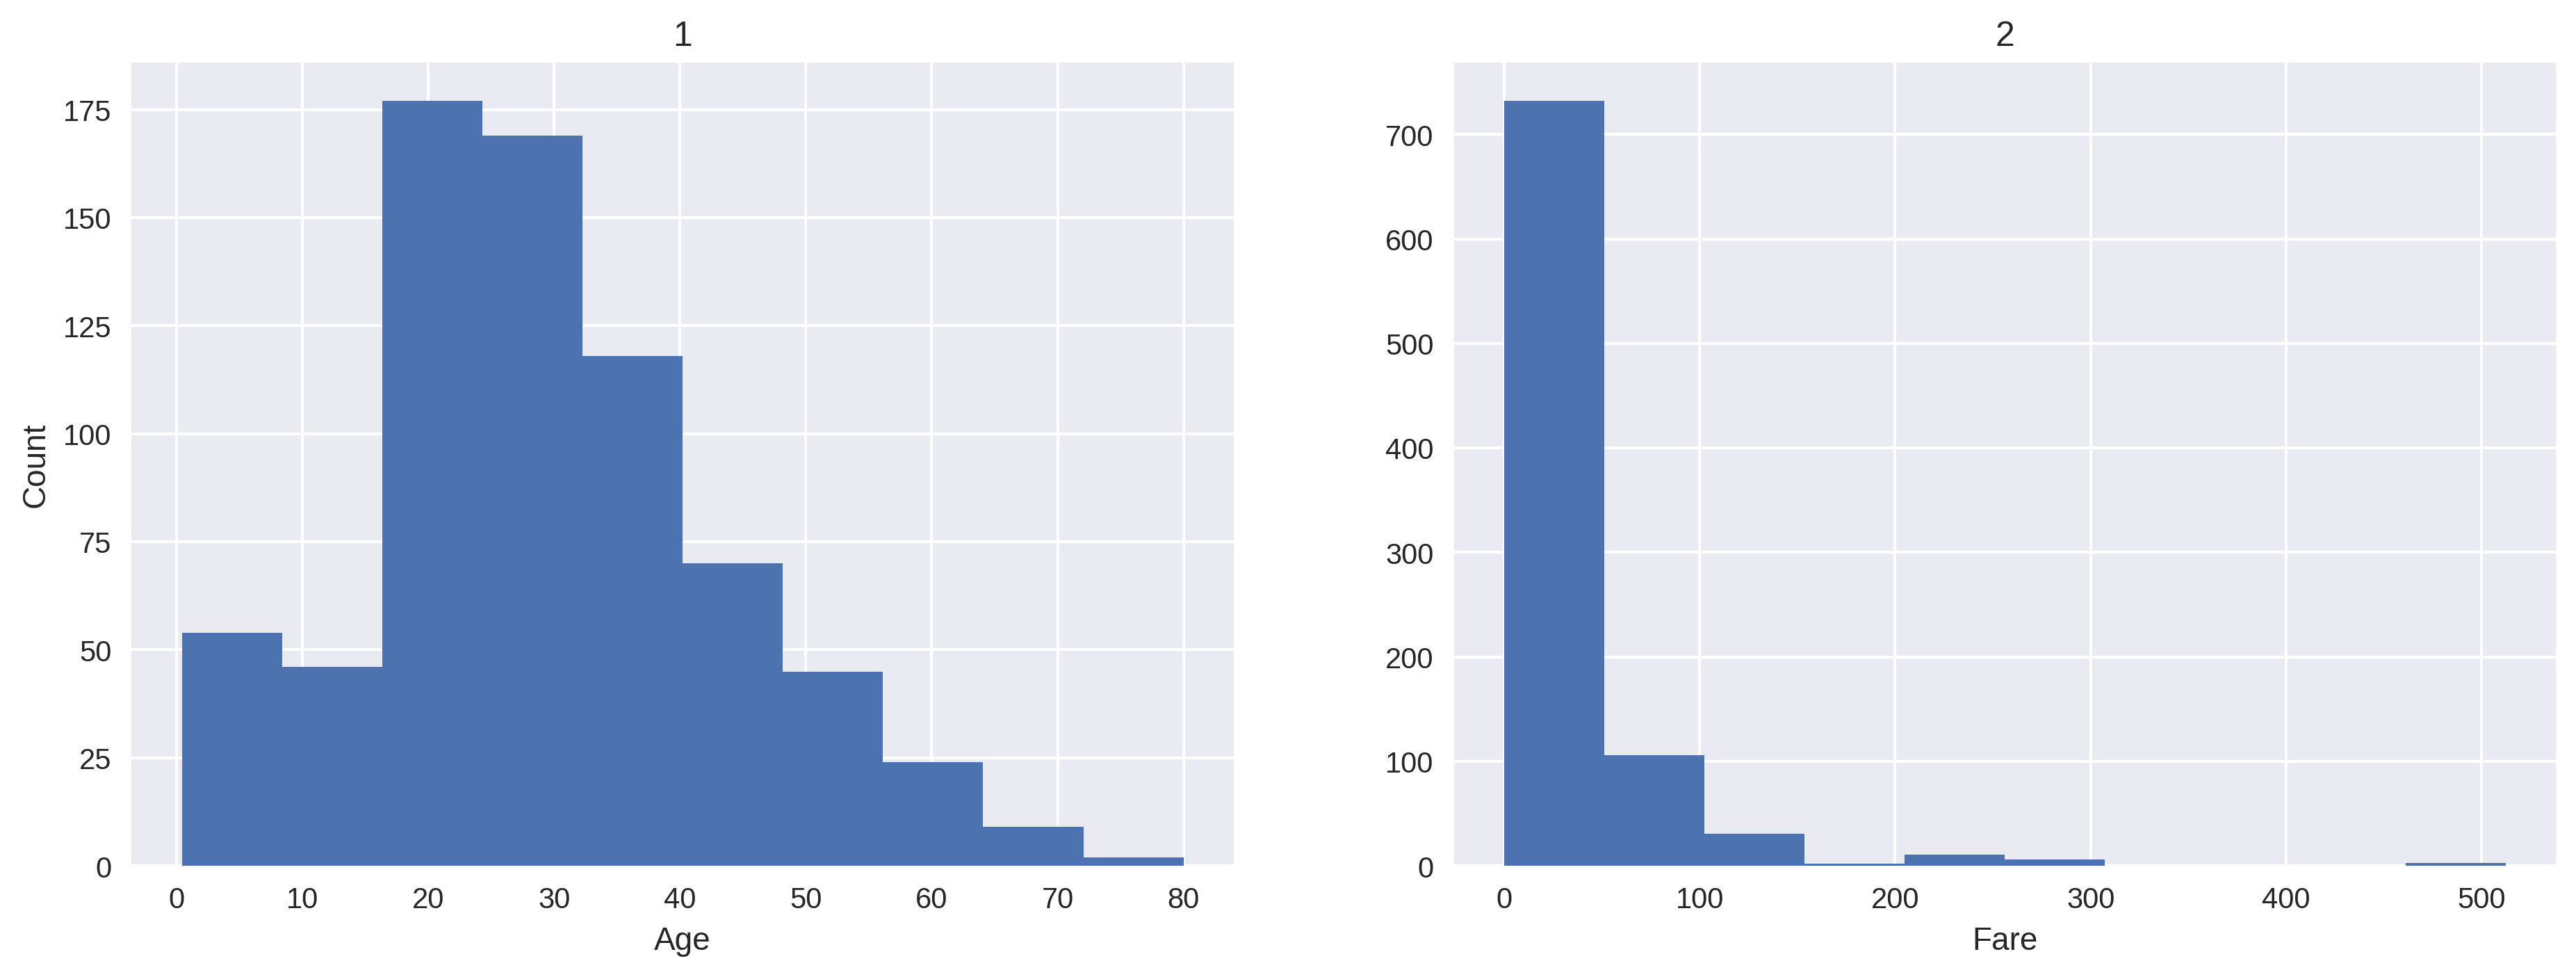

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

axs[0].set_title("1")
axs[0].hist(df["Age"])
axs[0].set_ylabel("Count")
axs[0].set_xlabel("Age")

axs[1].set_title("2")
axs[1].hist(df["Fare"])
axs[1].set_xlabel("Fare")

plt.show()

**Бонус!** Строим самые красивые графики.

NB: вам понадобится установить на свою OS несколько шрифтов (см. ворнинги при запуске).

In [ ]:
with plt.xkcd():
    plt.title("Age")
    df["Age"].hist(bins=50);

In [ ]:
with plt.xkcd(scale=10):
    plt.title("Age")
    df["Age"].hist(bins=50);

## 2. Обрабатываем признаки

1. Найдем признаки, у которых есть пропущенные значения, и обработаем эти пропущенные значения
2. Переведём категориальные признаки в числовые

#### Обработаем признак `Sex`

**Задание.** Проверьте, есть ли пропуски в столбце `Sex`.

In [39]:
# <YOUR CODE HERE>
df.Sex.isnull().sum()

0

In [40]:
df.Age.isnull().sum()

177

In [41]:
df.Sex.unique()

array(['male', 'female', 'unknown'], dtype=object)

In [77]:
(df.Sex == 'unknown').sum()

0

In [45]:
'Miss' in 'O\'Dwyer; Miss. Ellen "Nellie"'

True

In [76]:
df[df.Sex == 'unknown']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


**Задание *.** Подумайте, можно ли как-то узнать пол пассажиров, которые отнесены к категории unknown?

In [ ]:
# <YOUR CODE HERE>

In [47]:
df.Name.apply(lambda x: x.split('; ')[1].split()[0]).unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'the',
       'Jonkheer.'], dtype=object)

In [50]:
# <YOUR CODE HERE>
df.loc[13] = df.loc[13].replace('unknown', 'male')

In [67]:
mr_filter = df.Name.apply(lambda x : 'Mr.' in x)

In [72]:
filter_temp = []
for prefix in ['Miss.', 'Mrs.', 'Master.']:
  filter_temp.append(df.Name.apply(lambda x : prefix in x))

In [73]:
prefixes = ['Miss.', 'Mrs.', 'Master.']

In [74]:
filters = [df.Name.apply(lambda x : prefix in x) for prefix in prefixes]

In [75]:
for i, filter in enumerate(filters):
  if prefixes[i] in ['Miss.', 'Mrs.']:
    df.loc[filter] = df.loc[filter].replace('unknown', 'female')
  else:
    df.loc[filter] = df.loc[filter].replace('unknown', 'male')

In [68]:
df.loc[mr_filter] = df.loc[mr_filter].replace('unknown', 'male')

In [61]:
df.Name.apply(lambda x : 'Mr.' in x)

0       True
1      False
2      False
3      False
4       True
       ...  
886    False
887    False
888    False
889     True
890     True
Name: Name, Length: 891, dtype: bool

Признак `Sex` является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа. Как это можно сделать?

**Задание.** Придумайте кодировку и сделайте её.

In [84]:
a = [1, 2, 3, 4]
print(a)
b = a
b[1] = -1
print(a)
print(b)
b is a

[1, 2, 3, 4]
[1, -1, 3, 4]
[1, -1, 3, 4]


True

In [83]:
a = [1, 2, 3, 4]
print(a)
b = copy(a)
b[1] = -1
print(a)
print(b)
b is a

[1, 2, 3, 4]
[1, 2, 3, 4]
[1, -1, 3, 4]


False

In [86]:
a = [1, [10, 11], [19, 20], 4]
print(a)
b = deepcopy(a)
b[1][0] = -1
print(a)
print(b)
b is a

[1, [10, 11], [19, 20], 4]
[1, [10, 11], [19, 20], 4]
[1, [-1, 11], [19, 20], 4]


False

In [80]:
from copy import copy

In [81]:
from copy import deepcopy

In [87]:
Data = deepcopy(df)

In [88]:
Data['is_male'] = df['Sex'] == 'male'

In [89]:
Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_male
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila; Rev. Juozas,male,27.0,0,0,211536,13.0000,NaN,S,True
887,888,1,1,Graham; Miss. Margaret Edith,female,19.0,0,0,112053,30.0000,B42,S,False
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,False
889,890,1,1,Behr; Mr. Karl Howell,male,26.0,0,0,111369,30.0000,C148,C,True


После первичной обработки можем посмотреть, как влияет пол на выживаемость.

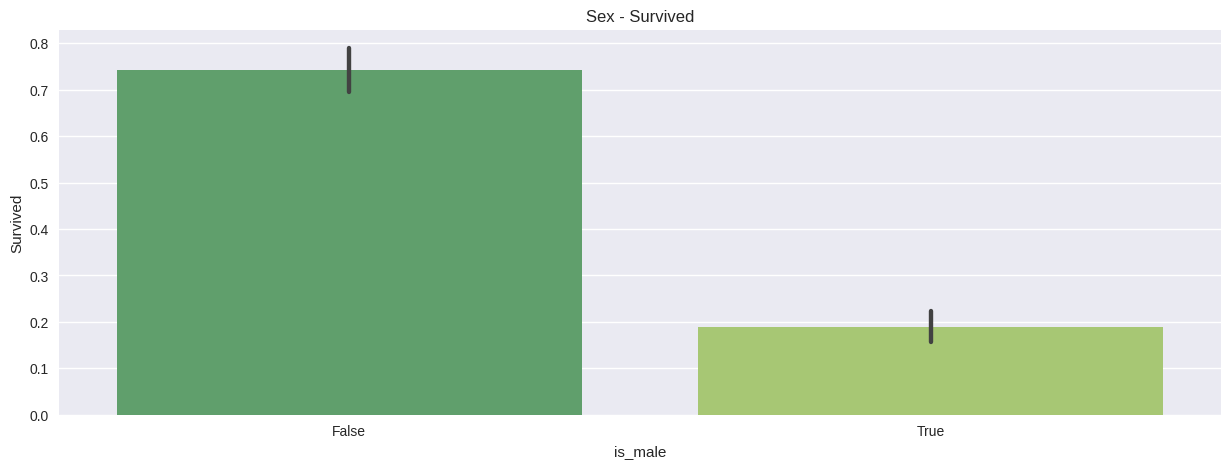

In [90]:
sns.barplot(x="is_male", y="Survived", data=Data, palette="summer")
plt.title("Sex - Survived")
plt.show()

Посмотрим, как влияет пол человека и класс билета (Pclass) на выживаемость

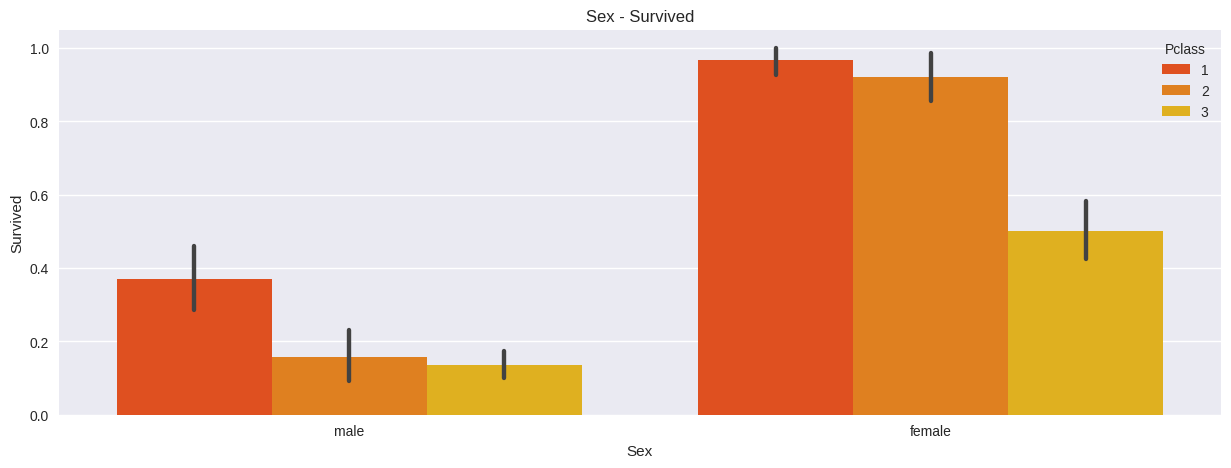

In [91]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=Data, palette="autumn")
plt.title("Sex - Survived")
plt.show()

Ещё один полезный вид визуализации — ящик с усами. Такой вид графиков позволяет визуально оценить моду и разброс распределения признака. Посмотрим на ящик с усами, отражающий распределение пассажиров по полу и возрасту.

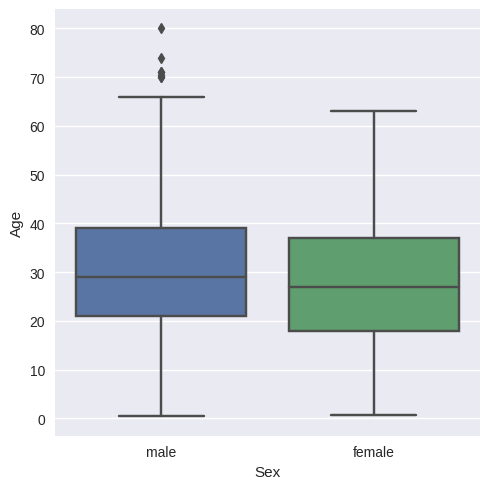

In [92]:
sns.catplot(x="Sex", y="Age", data=Data, kind="box")  # box plot (box-and-whiskers-plot)
plt.show()

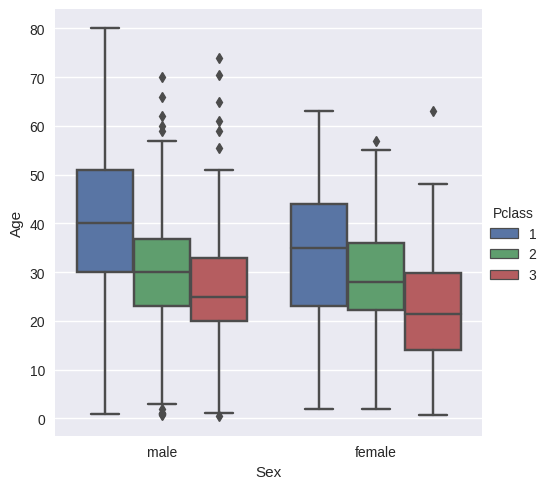

In [95]:
sns.catplot(x="Sex", y="Age", hue="Pclass", data=Data, kind="box")
plt.show()

#### Обработаем признак `Embarked` (порт посадки)

In [98]:
print(f"Data size: {Data.shape}")
Data["Embarked"].value_counts(dropna=False)

Data size: (891, 13)


S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

**Задание.** Удалите из таблицы пассажиров, для которых неизвестен порт посадки.

In [99]:
# <YOUR CODE HERE>
Data.dropna(subset=['Embarked'], inplace=True)

In [100]:
print(f"Data size: {Data.shape}")

Data size: (889, 13)


**Задание.** Преобразуем столбец `Embarked` методом OneHot-кодирования при помощи `pd.get_dummies)`.

In [103]:
# <YOUR CODE HERE>
Data = pd.get_dummies(Data, columns=['Embarked'], drop_first=True)

In [104]:
Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,is_male,Embarked_Q,Embarked_S
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,True,0,1
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,False,0,0
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,0,1
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,False,0,1
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila; Rev. Juozas,male,27.0,0,0,211536,13.0000,NaN,True,0,1
887,888,1,1,Graham; Miss. Margaret Edith,female,19.0,0,0,112053,30.0000,B42,False,0,1
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,False,0,1
889,890,1,1,Behr; Mr. Karl Howell,male,26.0,0,0,111369,30.0000,C148,True,0,0


#### Обработаем признак `Age`

Проверьте, если ли в `Age` пропущенные значения.

In [105]:
# <YOUR CODE HERE>
Data.Age.isna().sum()

177


Заполним пропуски медианным значением `Age`.

In [106]:
median_age = Data["Age"].median()
print(median_age)
Data["Age"].fillna(median_age, inplace=True)

28.0


In [107]:
Data.Age.isna().sum()

0

Нарисуем распределение возраста пассажиров.

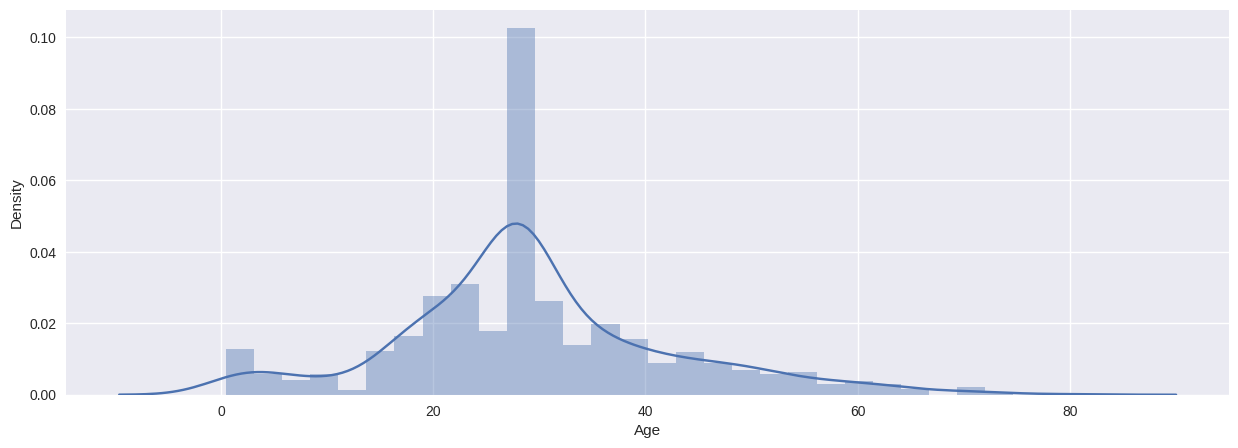

In [110]:
sns.distplot(Data["Age"], kde=True)
plt.show()

Посмотрим на распределение `Pclass` по возрастам.

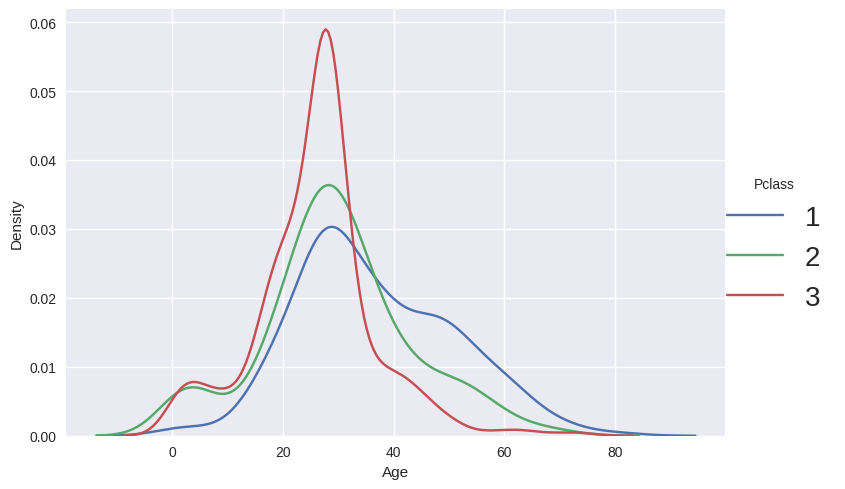

In [111]:
facet = sns.FacetGrid(data=Data, hue="Pclass", legend_out=True, height=5, aspect=1.5)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend(fontsize=20);

In [114]:
pivot = pd.pivot_table(Data,
  index="Sex", columns="Pclass",
  values="Age", aggfunc="count",
  margins=True, margins_name="Total")
pivot

Pclass,1,2,3,Total
Sex,,,,
female,92,76,144,312
male,122,108,347,577
Total,214,184,491,889


#### Обработаем признак `Fare`

**Задание.** Проверьте, если ли в `Fare` пропущенные значения. Если пропущенные значения есть, заполните их медианным значением `Fare`.

In [ ]:
# <YOUR CODE HERE>

#### Обработаем признак `Pclass`

**Задание.** Проверьте, если ли в `Pclass` пропущенные значения. Если пропущенные значения есть, заполните их самым частым значением `Pclass`.

In [116]:
# <YOUR CODE HERE>
Data["Pclass"].value_counts(dropna=False)

3    491
1    214
2    184
Name: Pclass, dtype: int64

**Задание.** Нарисуйте гистограмму выживаемости в зависимости от `Pclass`.

<Axes: xlabel='Pclass', ylabel='Survived'>

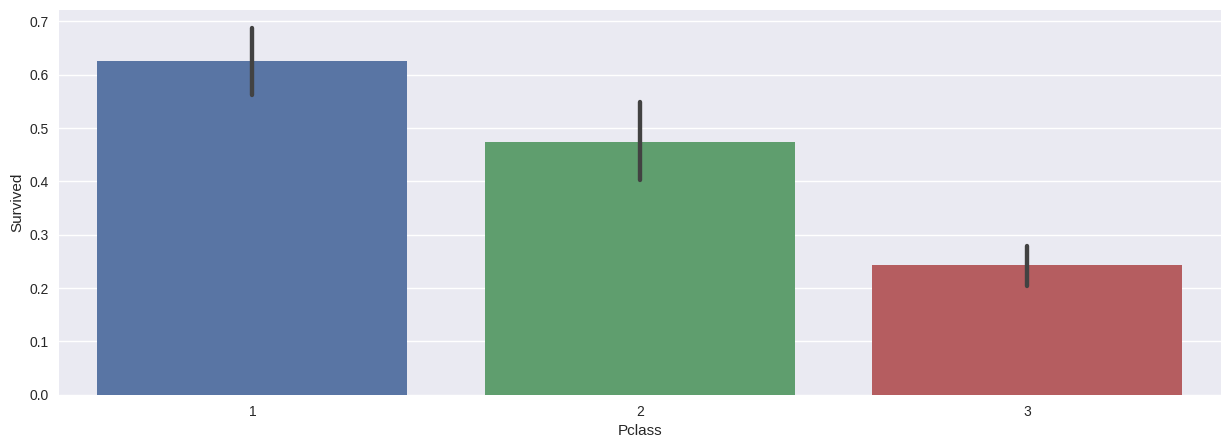

In [112]:
# <YOUR CODE HERE>
sns.barplot(x='Pclass', y='Survived', data=Data)

#### Обработаем признак `SibSp` (число братьев или сестер, мужей, жен)

Проверим, если ли в `SibSp` пропущенные значения.

In [117]:
Data["SibSp"].value_counts(dropna=False)

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

#### Обработаем признак `Parch` (число братьев или сестер, мужей, жен)

Проверим, если ли в `Parch` пропущенные значения.

In [118]:
Data["Parch"].value_counts(dropna=False)

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Хорошей идеей будет объединить Parch и SibSp

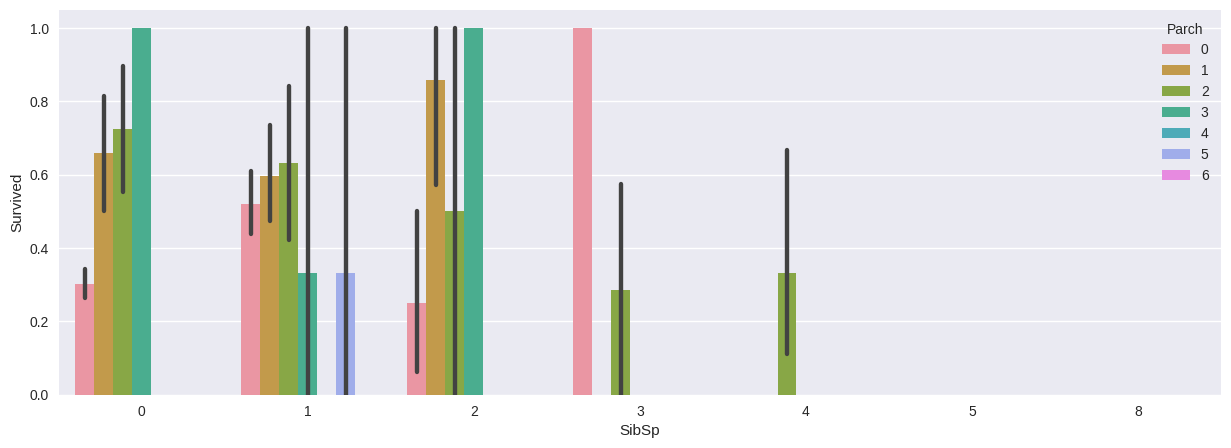

In [122]:
sns.barplot(x="SibSp", y="Survived", hue="Parch", data=Data)
plt.show()

**Задание.** Столбец PassengerId является категориальным и не несёт важной информации, удалите его.

In [ ]:
# <YOUR CODE HERE>

In [ ]:
Data.head()

## 3. Feature engineering

Нарисуем матрицу корреляций числовых признаков между собой и с целевой переменной.

**Задание.** Создайте таблицу `NumericData`, которая содержит только числовые столбцы из таблицы `Data`.

In [130]:
# <YOUR CODE HERE>
NumericData = Data[['Pclass', 'Age', 'Fare', 'is_male', 'Survived']]

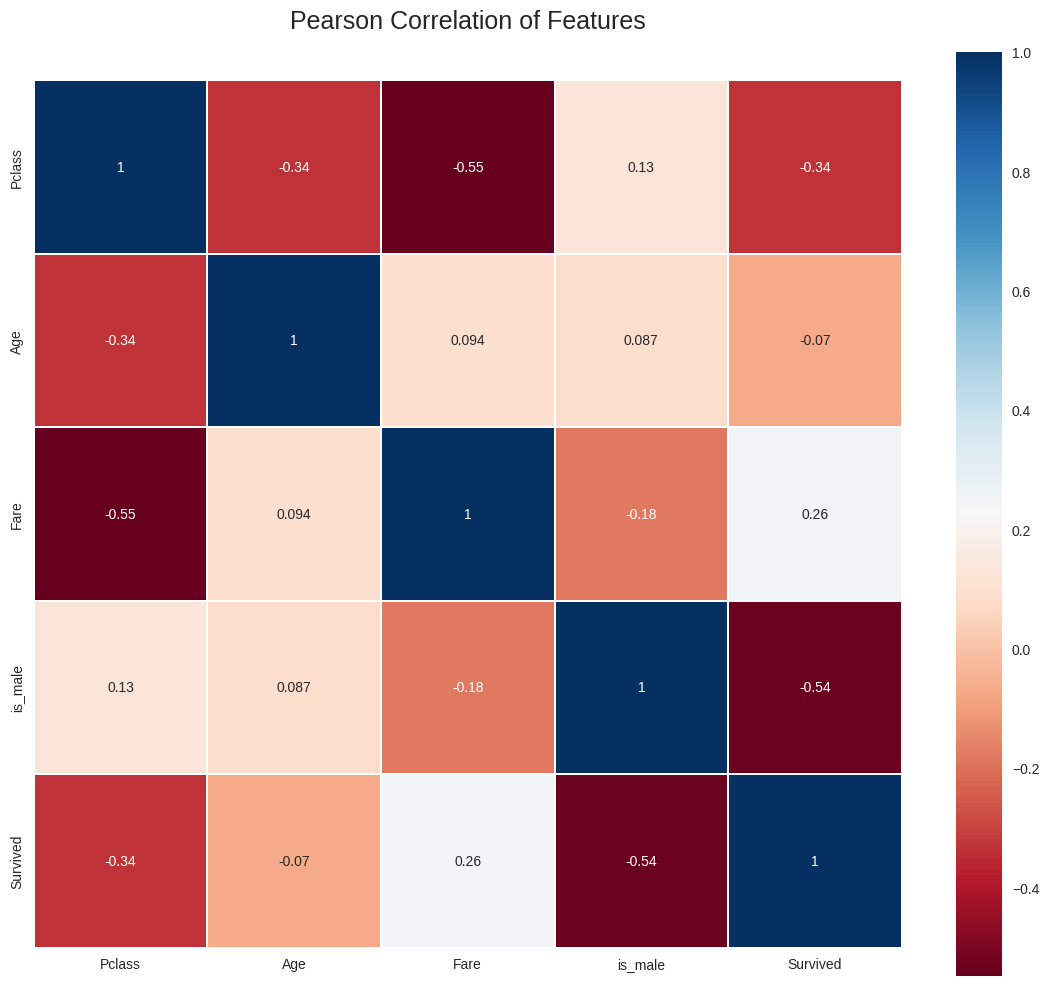

In [131]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))

plt.title("Pearson Correlation of Features", y=1.05, size=18)
sns.heatmap(
    NumericData.corr(),
    linewidths=0.1,
    vmax=1.0,
    square=True,
    cmap=colormap,
    linecolor="white",
    annot=True,
);

Посмотрим на попарные зависимости между некоторыми признаками.

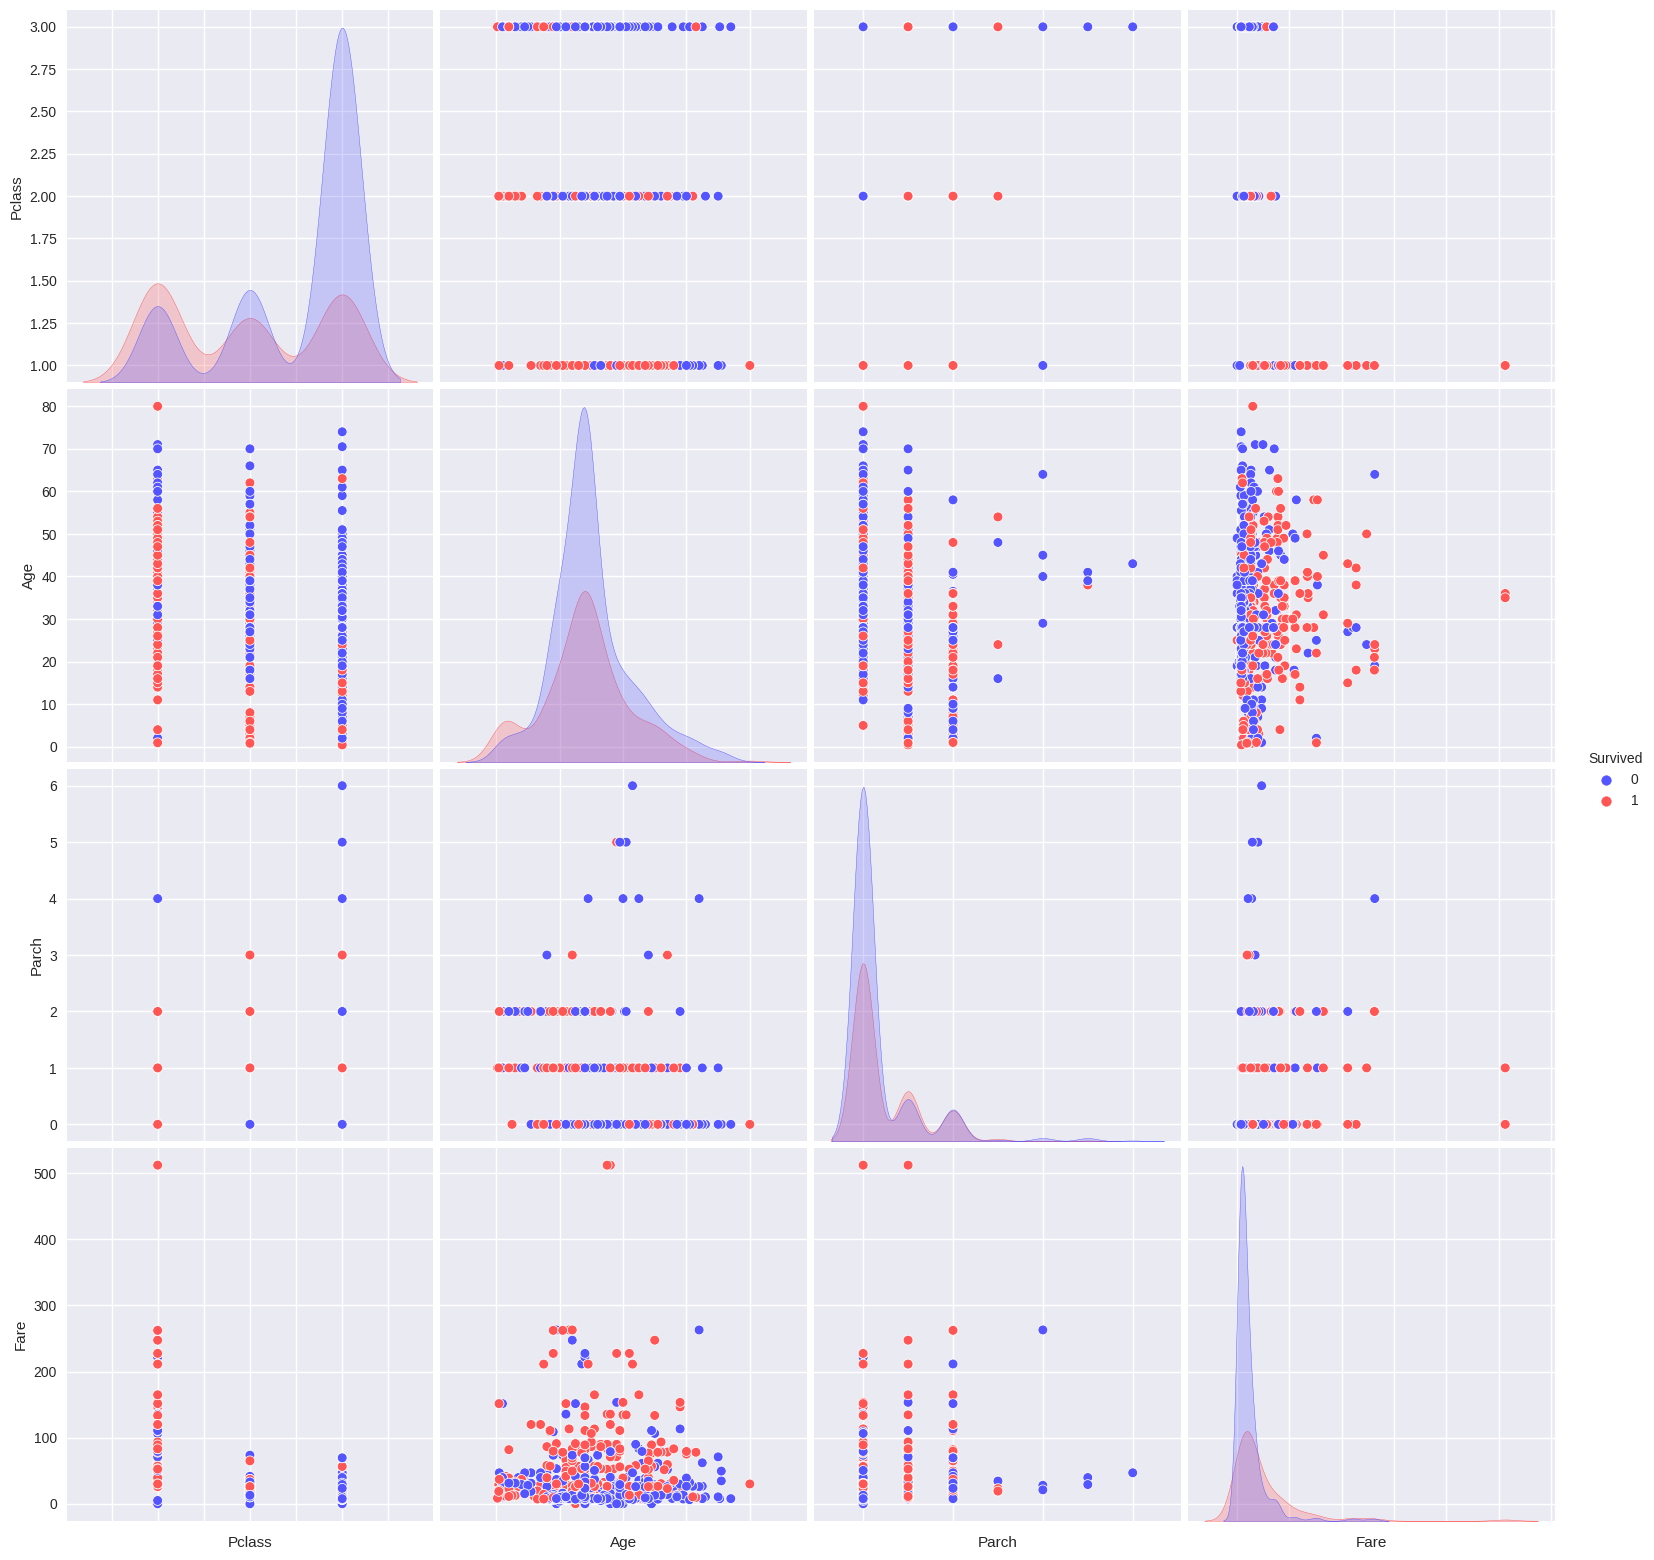

In [129]:
g = sns.pairplot(
    Data[["Survived", "Pclass", "Sex", "Age", "Parch", "Fare"]],
    hue="Survived",
    palette="seismic",
    size=4,
    diag_kind="kde",
    diag_kws=dict(shade=True),
    plot_kws=dict(s=50),
)
g.set(xticklabels=[]);

Зачастую признак может быть зашумлен или может содержать лишнюю (слишком детализированную, ведущую к переобучению) информацию. Возможным решением этой проблемы служит бинаризация признака.

Бинаризуем признаки `Age` и `Fare`.

* `pd.cut` — разбиение целочисленных данных на несколько интервалов по квантилям
* `pd.qcut` — разбиение числовых (необязательно целочисленных) данных на несколько интервалов по квантилям

In [123]:
Data["AgeBin"] = pd.cut(Data["Age"].astype(int), 5)
Data["AgeBin"].head()

0    (16.0, 32.0]
1    (32.0, 48.0]
2    (16.0, 32.0]
3    (32.0, 48.0]
4    (32.0, 48.0]
Name: AgeBin, dtype: category
Categories (5, interval[float64, right]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] <
                                           (48.0, 64.0] < (64.0, 80.0]]

In [124]:
Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,is_male,Embarked_Q,Embarked_S,AgeBin
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,True,0,1,"(16.0, 32.0]"
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,False,0,0,"(32.0, 48.0]"
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,0,1,"(16.0, 32.0]"
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,False,0,1,"(32.0, 48.0]"
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,True,0,1,"(32.0, 48.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila; Rev. Juozas,male,27.0,0,0,211536,13.0000,NaN,True,0,1,"(16.0, 32.0]"
887,888,1,1,Graham; Miss. Margaret Edith,female,19.0,0,0,112053,30.0000,B42,False,0,1,"(16.0, 32.0]"
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,False,0,1,"(16.0, 32.0]"
889,890,1,1,Behr; Mr. Karl Howell,male,26.0,0,0,111369,30.0000,C148,True,0,0,"(16.0, 32.0]"


Теперь переведём полученные интервалы в числа, используя `LabelEncoder`.

In [125]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
Data["AgeBin_Code"] = label.fit_transform(Data["AgeBin"])
Data[["Age", "AgeBin", "AgeBin_Code"]].head()

,Age,AgeBin,AgeBin_Code
0,22.0,"(16.0, 32.0]",1
1,38.0,"(32.0, 48.0]",2
2,26.0,"(16.0, 32.0]",1
3,35.0,"(32.0, 48.0]",2
4,35.0,"(32.0, 48.0]",2


In [126]:
Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,is_male,Embarked_Q,Embarked_S,AgeBin,AgeBin_Code
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,True,0,1,"(16.0, 32.0]",1
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,False,0,0,"(32.0, 48.0]",2
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,0,1,"(16.0, 32.0]",1
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,False,0,1,"(32.0, 48.0]",2
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,True,0,1,"(32.0, 48.0]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila; Rev. Juozas,male,27.0,0,0,211536,13.0000,NaN,True,0,1,"(16.0, 32.0]",1
887,888,1,1,Graham; Miss. Margaret Edith,female,19.0,0,0,112053,30.0000,B42,False,0,1,"(16.0, 32.0]",1
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,False,0,1,"(16.0, 32.0]",1
889,890,1,1,Behr; Mr. Karl Howell,male,26.0,0,0,111369,30.0000,C148,True,0,0,"(16.0, 32.0]",1


**Задание.** Бинаризуйте `Fare`, используя разбиение на 4 интервала.

In [ ]:
# <YOUR CODE HERE>

## Бонус

Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки `Parch` и `SibSp` слабо коррелируют с выживаемостью (`Survived`). Сконструируем новые признаки, чтобы решить эти проблемы.

**Задание.**

1) Создайте признак `NameLen` и запишите в него длину имени (Name).

2) Создайте признак `FamilySize`, равный `Parch` + `SibSp` + 1. Зачем добавлять 1?

3) Создайте признак `IsAlone`, который показывает, путешествовал человек один или с семьей.

In [ ]:
# <YOUR CODE HERE>